In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np
from sklearn.cluster import KMeans

On va créer des datasets pour chaque candidats :

In [2]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['N°Panneau.AN', 'Sexe.AN', 'Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]
df_RF = df[['N°Panneau.RF', 'Sexe.RF', 'Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]
df_ME = df[['N°Panneau.ME', 'Sexe.ME', 'Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]
df_LJ = df[['N°Panneau.LJ', 'Sexe.LJ', 'Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]
df_LPM = df[['N°Panneau.LPM', 'Sexe.LPM', 'Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]
df_ZE = df[['N°Panneau.ZE', 'Sexe.ZE', 'Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]
df_MJL = df[['N°Panneau.MJL', 'Sexe.MJL', 'Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]
df_HA = df[['N°Panneau.HA', 'Sexe.HA', 'Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]
df_JY = df[['N°Panneau.JY', 'Sexe.JY', 'Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]
df_PV = df[['N°Panneau.PV', 'Sexe.PV', 'Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]
df_PP = df[['N°Panneau.PP', 'Sexe.PP', 'Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]
df_DAN = df[['N°Panneau.DAN', 'Sexe.DAN', 'Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]

C:\Users\belkh\AppData\Local\Temp\ipykernel_16064\2468350984.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')


In [3]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans le dataset 0 : ", df0.shape[1])
print("Nombre d'observations dans le dataset 0 : ", df0.shape[0])

print("Nombre de variables dans un dataset candidat : ", df_AN.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df_AN.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans le dataset 0 :  21
Nombre d'observations dans le dataset 0 :  69681
Nombre de variables dans un dataset candidat :  7
Nombre d'observations dans un dataset candidat :  69681


On calcule le nombre d'inscrits, de participants et de personnes s'étant abstenues :

In [4]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalVot = np.sum(df['Votants'])
totalBlanc = np.sum(df['Blancs'])
totalAbs = np.sum(df['Abstentions'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votants : ", totalVot)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)

Nombre d'inscrits :  48747231
Nombre de votants :  35923170
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593


In [5]:
# Quels sont les différents taux ?

rappVot = 100*totalVot/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns


print("Absentention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappVot, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")

Absentention :  26.31 %
Participation :  73.69 %
Dont 1.12 % de votes blancs


Une abstention de 26%, ce qui est assez remarquable.
Plus que n'importe quel candidat.
Traçons les diagrammes camemberts des résultats sans puis avec abstentions et votes blancs:

In [6]:
voixCandidat = np.array([np.sum(df['Voix.AN']), np.sum(df['Voix.RF']), np.sum(df['Voix.ME']), np.sum(df['Voix.LJ']), np.sum(df['Voix.LPM']), 
np.sum(df['Voix.ZE']), np.sum(df['Voix.MJL']), np.sum(df['Voix.HA']), np.sum(df['Voix.JY']), np.sum(df['Voix.PV']), np.sum(df['Voix.PP']), 
np.sum(df['Voix.DAN'])])


label = [df['Nom.AN'][0], df['Nom.RF'][0], df['Nom.ME'][0], df['Nom.LJ'][0], df['Nom.LPM'][0], df['Nom.ZE'][0], df['Nom.MJL'][0], df['Nom.HA'][0], 
df['Nom.JY'][0], df['Nom.PV'][0], df['Nom.PP'][0], df['Nom.DAN'][0]]

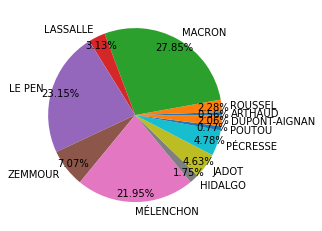

In [7]:
camembert = plt.pie(voixCandidat, labels=label, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance=0.9)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

Avec l'abstention et les votes blancs :

In [8]:
df_AN = df[['N°Panneau.AN', 'Sexe.AN', 'Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]
df_RF = df[['N°Panneau.RF', 'Sexe.RF', 'Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]
df_ME = df[['N°Panneau.ME', 'Sexe.ME', 'Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]
df_LJ = df[['N°Panneau.LJ', 'Sexe.LJ', 'Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]
df_LPM = df[['N°Panneau.LPM', 'Sexe.LPM', 'Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]
df_ZE = df[['N°Panneau.ZE', 'Sexe.ZE', 'Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]
df_MJL = df[['N°Panneau.MJL', 'Sexe.MJL', 'Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]
df_HA = df[['N°Panneau.HA', 'Sexe.HA', 'Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]
df_JY = df[['N°Panneau.JY', 'Sexe.JY', 'Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]
df_PV = df[['N°Panneau.PV', 'Sexe.PV', 'Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]
df_PP = df[['N°Panneau.PP', 'Sexe.PP', 'Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]
df_DAN = df[['N°Panneau.DAN', 'Sexe.DAN', 'Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]

In [9]:
voixCandidat1 = np.array([np.sum(df['Voix.AN']), np.sum(df['Voix.RF']), np.sum(df['Voix.ME']), np.sum(df['Voix.LJ']), np.sum(df['Voix.LPM']), 
np.sum(df['Voix.ZE']), np.sum(df['Voix.MJL']), np.sum(df['Voix.HA']), np.sum(df['Voix.JY']), np.sum(df['Voix.PV']), np.sum(df['Voix.PP']), np.sum(df['Voix.DAN']), np.sum(df['Blancs']), totalAbs])

label1 = [df['Nom.AN'][0], df['Nom.RF'][0], df['Nom.ME'][0], df['Nom.LJ'][0], df['Nom.LPM'][0], df['Nom.ZE'][0], df['Nom.MJL'][0], df['Nom.HA'][0], 
df['Nom.JY'][0], df['Nom.PV'][0], df['Nom.PP'][0], df['Nom.DAN'][0], 'BLANCS', 'ABSTENTION']

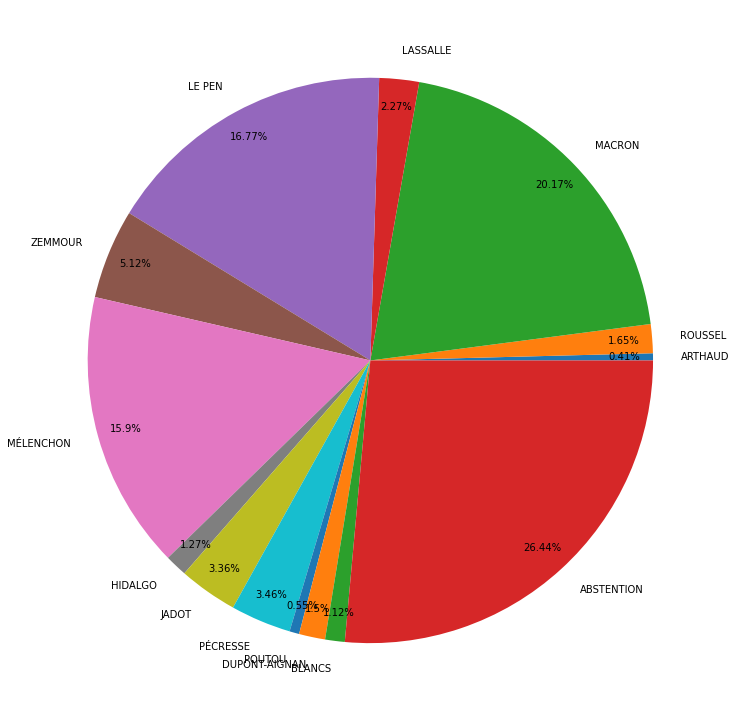

In [10]:
camembert = plt.pie(voixCandidat1, labels=label1, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance = 0.9, labeldistance = 1.1)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

On peut voir que l'abstention a joué un rôle très important dans ce 1er tour.
En effet, n'importe quel candidat pourrait arriver 1er si il récupérait les voix de l'abstention

In [11]:
dftemp = pd.pivot_table(data = df, index = 'Libellé de la commune', values = 'Voix.ZE', aggfunc = 'sum')
dftemp

,Voix.ZE
Libellé de la commune,
Aast,8
Abainville,17
Abancourt,45
Abaucourt,15
Abaucourt-Hautecourt,5
...,...
Éloise,36
Étercy,45
Étrembières,56


------------------------


----------------------

# Departements avec le plus d'abstention


In [12]:
def abs_dep(taille,asc):
    dep_abs = df[['Code du département','Libellé du département','% Abs/Ins']]
    frame = pd.DataFrame(dep_abs)
    abs_dep = frame.groupby(["Code du département","Libellé du département"]).mean()
    plus = abs_dep.sort_values(by='% Abs/Ins',ascending=asc).reset_index()
    return plus.head(taille)
    

In [13]:
abs_dep(10,False)

,Code du département,Libellé du département,% Abs/Ins
0,ZN,Nouvelle-Calédonie,73.164848
1,ZP,Polynésie française,65.641320
2,ZC,Guyane,64.384403
3,ZZ,Français établis hors de France,63.551143
4,ZX,Saint-Martin/Saint-Barthélemy,59.948846
5,ZM,Mayotte,59.400765
6,ZB,Martinique,57.606156
7,ZA,Guadeloupe,55.469192
8,ZD,La Réunion,46.502989
9,ZS,Saint-Pierre-et-Miquelon,46.465000


On voit que ce sont les département outre-mers qui ont les plus grands taux d'Abstention

In [14]:
abs_dep(10,True)

,Code du département,Libellé du département,% Abs/Ins
0,32,Gers,17.503438
1,46,Lot,17.789475
2,48,Lozère,19.043175
3,24,Dordogne,19.101536
4,19,Corrèze,19.171172
5,40,Landes,19.180465
6,12,Aveyron,19.371526
7,31,Haute-Garonne,19.400105
8,39,Jura,19.475089
9,9,Ariège,19.552454


# Voix et %voix par département et communes


In [15]:
#Fonctions pour voix et %voix par département individuelles
def dep(x,y):
      tab = df[['Code du département','Libellé du département', x]]
      frame1 = pd.DataFrame(tab)
      tab2 = frame1.groupby(["Code du département","Libellé du département"]).sum()
      res = tab2.sort_values(by=x,ascending=y)
      
      return res.head(20)


def dep_prct(x,y):
      tab = df[['Code du département','Libellé du département', x]]
      frame1 = pd.DataFrame(tab)
      tab2 = frame1.groupby(["Code du département","Libellé du département"]).mean()
      res = tab2.sort_values(by=x,ascending=y)
      
      return res.head(20)

dep('Voix.ME', False)

dep_prct('% Voix/Ins.MJL', False)

,,% Voix/Ins.MJL
Code du département,Libellé du département,
93,Seine-Saint-Denis,33.204836
94,Val-de-Marne,26.587269
ZA,Guadeloupe,23.906081
94,Val-de-Marne,23.333376
95,Val-d'Oise,23.157016
75,Paris,22.732333
9,Ariège,22.067836
ZB,Martinique,21.207718
ZS,Saint-Pierre-et-Miquelon,20.777500


In [16]:
#Fonctions pour voix et %voix par département générique
def dep_candidat(voix,prct,choix,asc):
    tab = df[['Libellé du département', voix]]
    tab1 = df[['Libellé du département', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé du département"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé du département"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [28]:
dep_candidat('Voix.LPM','% Voix/Ins.LPM',1,True)

,Libellé du département,Voix.LPM,% Voix/Ins.LPM
86,Saint-Pierre-et-Miquelon,459,9.617500
104,Wallis et Futuna,579,6.080000
85,Saint-Martin/Saint-Barthélemy,1445,5.436538
36,Guyane,6334,6.130224
62,Lozère,10497,17.819153
...,...,...,...
99,Var,183287,22.142497
34,Gironde,191542,17.808384
12,Bouches-du-Rhône,264753,18.936650
79,Pas-de-Calais,305816,28.180422


In [27]:
dep_candidat('Voix.ZE','% Voix/Ins.ZE',1,True)

,Libellé du département,Voix.ZE,% Voix/Ins.ZE
86,Saint-Pierre-et-Miquelon,80,1.372500
104,Wallis et Futuna,118,1.240000
68,Mayotte,482,0.477432
85,Saint-Martin/Saint-Barthélemy,1107,4.175000
36,Guyane,1573,1.467090
...,...,...,...
84,Rhône,74168,6.300759
3,Alpes-Maritimes,78208,10.024353
99,Var,79329,9.625557
78,Paris,86088,6.424833


----------------------------------------------

In [18]:
#Fonctions pour voix et %voix par commune générique
def comm_candidat(voix,prct,choix,asc):
    tab = df[['Libellé de la commune', voix]]
    tab1 = df[['Libellé de la commune', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé de la commune"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé de la commune"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [19]:
comm_candidat('Voix.MJL','% Voix/Ins.MJL',2, False)

,Libellé de la commune,Voix.MJL,% Voix/Ins.MJL
16917,Loubaut,18,72.00
9238,Eourres,71,69.61
30661,Vachères-en-Quint,22,64.71
23268,Quirbajou,25,59.52
18773,Molezon,50,58.14
...,...,...,...
12450,Hodenc-l'Evêque,0,0.00
11471,Gourdièges,0,0.00
3201,Blanzée,0,0.00
32503,Voncourt,0,0.00
